In [2]:
from pathlib import Path
import cartopy.crs as ccrs
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
ds_ales=xr.open_dataset(r'D:\Datasets\Curve_fit\Process\040\ales_040.nc')

In [4]:
ds_ales

<xarray.Dataset>
Dimensions:              (index: 6127)
Coordinates:
  * index                (index) int64 0 1 2 3 4 5 ... 6122 6123 6124 6125 6126
Data variables:
    lat                  (index) float32 ...
    lon                  (index) float32 ...
    Trend                (index) float64 ...
    Trend_Error_Bar      (index) float64 ...
    Amplitude            (index) float64 ...
    Amplitude_Error_Bar  (index) float64 ...
    Phase                (index) float64 ...
    Valid                (index) float64 ...
    Outliers             (index) float64 ...
    Dist_to_coast        (index) float64 ...

<ipython-input-5-efc6e9664b01>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))


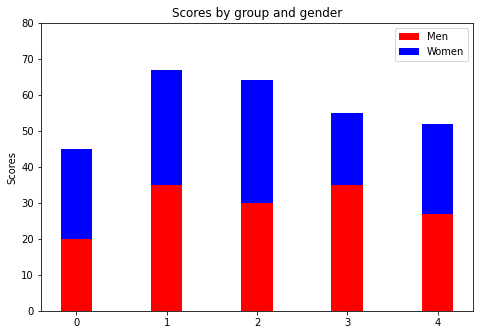

In [5]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()

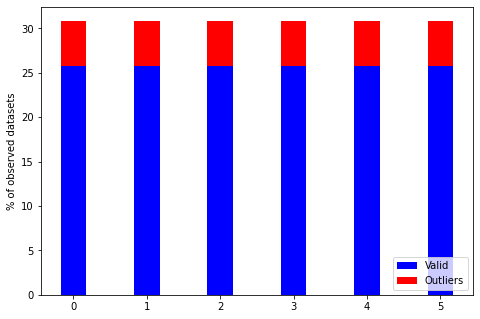

In [6]:

N=6
ind =np.arange(N) # the x locations for the groups
width = 0.35
v=ds_ales.Valid[0:2].values
o=ds_ales.Outliers[0:2].values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind,ds_ales.Valid[0].values, width, color='b')
ax.bar(ind, ds_ales.Outliers[0].values, width,bottom=ds_ales.Valid[0].values, color='r')
ax.set_ylabel('% of observed datasets')
#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Valid', 'Outliers'],loc='lower right')
plt.show()

(0.0, 15.0)

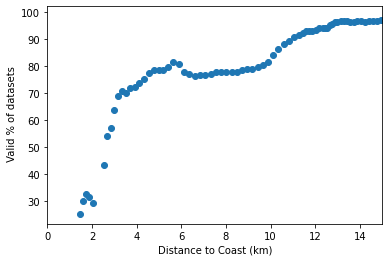

In [7]:
plt.figure()
plt.scatter(ds_ales['Dist_to_coast'],ds_ales["Valid"])
plt.xlabel('Distance to Coast (km)')
plt.ylabel(' Valid % of datasets')
plt.xlim([0,15])

In [8]:
ds_duacs=xr.open_dataset(r'D:\Datasets\Curve_fit\Process\040\duacs_040.nc')

In [9]:
ds_duacs

<xarray.Dataset>
Dimensions:              (index: 6127)
Coordinates:
  * index                (index) int64 0 1 2 3 4 5 ... 6122 6123 6124 6125 6126
Data variables:
    lat                  (index) float32 ...
    lon                  (index) float32 ...
    Trend                (index) float64 ...
    Trend_Error_Bar      (index) float64 ...
    Amplitude            (index) float64 ...
    Amplitude_Error_Bar  (index) float64 ...
    Phase                (index) float64 ...
    Dist_to_coast        (index) float64 ...

In [10]:
Adeviation=ds_ales['Amplitude'].values-ds_duacs['Amplitude'].values

In [11]:
ds_ales['Amplitude_deviation']=Adeviation

In [12]:
ds_ales

<xarray.Dataset>
Dimensions:              (Amplitude_deviation: 6127, index: 6127)
Coordinates:
  * index                (index) int64 0 1 2 3 4 5 ... 6122 6123 6124 6125 6126
  * Amplitude_deviation  (Amplitude_deviation) float64 -1.215 -1.556 ... 0.4699
Data variables:
    lat                  (index) float32 0.000644 0.002599 ... 16.12 16.12
    lon                  (index) float32 87.17 87.17 87.17 ... 81.22 81.21 81.21
    Trend                (index) float64 0.822 2.204 1.355 ... 5.864 -2.927
    Trend_Error_Bar      (index) float64 1.739 1.364 1.235 ... 8.562 8.662 9.678
    Amplitude            (index) float64 2.703 2.361 2.5 ... 20.9 18.17 9.33
    Amplitude_Error_Bar  (index) float64 1.114 0.9005 0.8037 ... 5.129 5.521
    Phase                (index) float64 205.0 181.3 218.5 ... 64.39 35.54 29.13
    Valid                (index) float64 25.7 51.08 56.05 ... 32.84 30.18 25.37
    Outliers             (index) float64 5.161 5.519 4.734 ... 5.556 2.747 3.268
    Dist_to_coast        (index) float64 939.5 939.3 939.0 ... 1.752 1.606 1.466

In [13]:
ds_ales['Amplitude_deviation']

<xarray.DataArray 'Amplitude_deviation' (Amplitude_deviation: 6127)>
array([-1.214761, -1.556376, -1.417704, ..., 12.04441 ,  9.314812,  0.469906])
Coordinates:
  * Amplitude_deviation  (Amplitude_deviation) float64 -1.215 -1.556 ... 0.4699

No handles with labels found to put in legend.


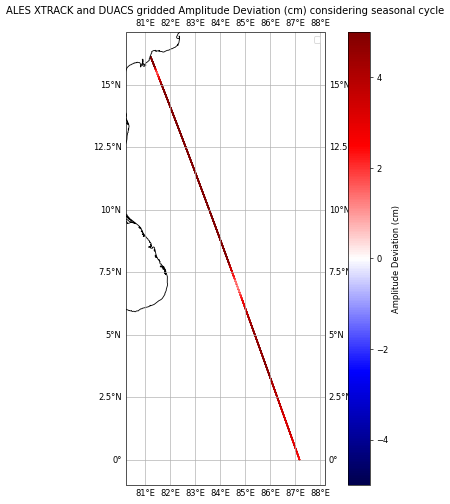

In [14]:
#plot ALES curve fit amplitude deviation
dl=1.
extent = [ds_ales.lon.min()-dl, ds_ales.lon.max()+dl, ds_ales.lat.min()-dl, ds_ales.lat.max()+dl]
cmap_trend = plt.get_cmap('seismic')
fig=plt.figure(figsize=(10,10),dpi=60)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
sc=ax.scatter(ds_ales.lon,ds_ales.lat,c=ds_ales.Amplitude,marker='.',s=2,cmap=cmap_trend,vmin=-5,vmax=5)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='10m') 
plt.colorbar(sc,label='Amplitude Deviation (cm)',orientation='vertical')
plt.title("ALES XTRACK and DUACS gridded Amplitude Deviation (cm) considering seasonal cycle")
plt.legend()

In [15]:
Tdeviation=ds_ales['Trend'].values-ds_duacs['Trend'].values

In [16]:
Tdeviation

array([ -4.63106422,  -3.24896299,  -4.09818877, ..., -10.28497963,
         1.24972849,  -7.54150208])

In [17]:
ds_ales['Trend_deviation']=Tdeviation

In [18]:
ds_ales

<xarray.Dataset>
Dimensions:              (Amplitude_deviation: 6127, Trend_deviation: 6127, index: 6127)
Coordinates:
  * index                (index) int64 0 1 2 3 4 5 ... 6122 6123 6124 6125 6126
  * Amplitude_deviation  (Amplitude_deviation) float64 -1.215 -1.556 ... 0.4699
  * Trend_deviation      (Trend_deviation) float64 -4.631 -3.249 ... 1.25 -7.542
Data variables:
    lat                  (index) float32 0.000644 0.002599 ... 16.12 16.12
    lon                  (index) float32 87.17 87.17 87.17 ... 81.22 81.21 81.21
    Trend                (index) float64 0.822 2.204 1.355 ... 5.864 -2.927
    Trend_Error_Bar      (index) float64 1.739 1.364 1.235 ... 8.562 8.662 9.678
    Amplitude            (index) float64 2.703 2.361 2.5 ... 20.9 18.17 9.33
    Amplitude_Error_Bar  (index) float64 1.114 0.9005 0.8037 ... 5.129 5.521
    Phase                (index) float64 205.0 181.3 218.5 ... 64.39 35.54 29.13
    Valid                (index) float64 25.7 51.08 56.05 ... 32.84 30.18 25.37
    Outliers             (index) float64 5.161 5.519 4.734 ... 5.556 2.747 3.268
    Dist_to_coast        (index) float64 939.5 939.3 939.0 ... 1.752 1.606 1.466

In [19]:
ds_ales.update(ds_ales)

<xarray.Dataset>
Dimensions:              (Amplitude_deviation: 6127, Trend_deviation: 6127, index: 6127)
Coordinates:
  * index                (index) int64 0 1 2 3 4 5 ... 6122 6123 6124 6125 6126
  * Amplitude_deviation  (Amplitude_deviation) float64 -1.215 -1.556 ... 0.4699
  * Trend_deviation      (Trend_deviation) float64 -4.631 -3.249 ... 1.25 -7.542
Data variables:
    lat                  (index) float32 0.000644 0.002599 ... 16.12 16.12
    lon                  (index) float32 87.17 87.17 87.17 ... 81.22 81.21 81.21
    Trend                (index) float64 0.822 2.204 1.355 ... 5.864 -2.927
    Trend_Error_Bar      (index) float64 1.739 1.364 1.235 ... 8.562 8.662 9.678
    Amplitude            (index) float64 2.703 2.361 2.5 ... 20.9 18.17 9.33
    Amplitude_Error_Bar  (index) float64 1.114 0.9005 0.8037 ... 5.129 5.521
    Phase                (index) float64 205.0 181.3 218.5 ... 64.39 35.54 29.13
    Valid                (index) float64 25.7 51.08 56.05 ... 32.84 30.18 25.37
    Outliers             (index) float64 5.161 5.519 4.734 ... 5.556 2.747 3.268
    Dist_to_coast        (index) float64 939.5 939.3 939.0 ... 1.752 1.606 1.466

In [20]:
ds_ales.to_netcdf("D:\Datasets\Curve_fit\dev.nc")

In [21]:
ds_ales['Trend_deviation'].max()

<xarray.DataArray 'Trend_deviation' ()>
array(3.61656502)

<function matplotlib.pyplot.legend(*args, **kwargs)>

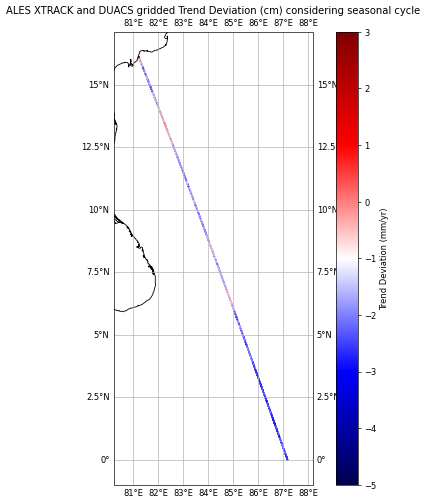

In [22]:
#plot ALES curve fit trend deviation
dl=1.
extent = [ds_ales.lon.min()-dl, ds_ales.lon.max()+dl, ds_ales.lat.min()-dl, ds_ales.lat.max()+dl]
cmap_trend = plt.get_cmap('seismic')
fig=plt.figure(figsize=(10,10),dpi=60)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
sc=ax.scatter(ds_ales.lon,ds_ales.lat,c=ds_ales.Trend_deviation,marker='.',s=2,vmin=-5,vmax=3,cmap=cmap_trend)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='10m') 
plt.colorbar(sc,label='Trend Deviation (mm/yr)',orientation='vertical')
plt.title("ALES XTRACK and DUACS gridded Trend Deviation (cm) considering seasonal cycle")
plt.legend

<IPython.core.display.Javascript object>


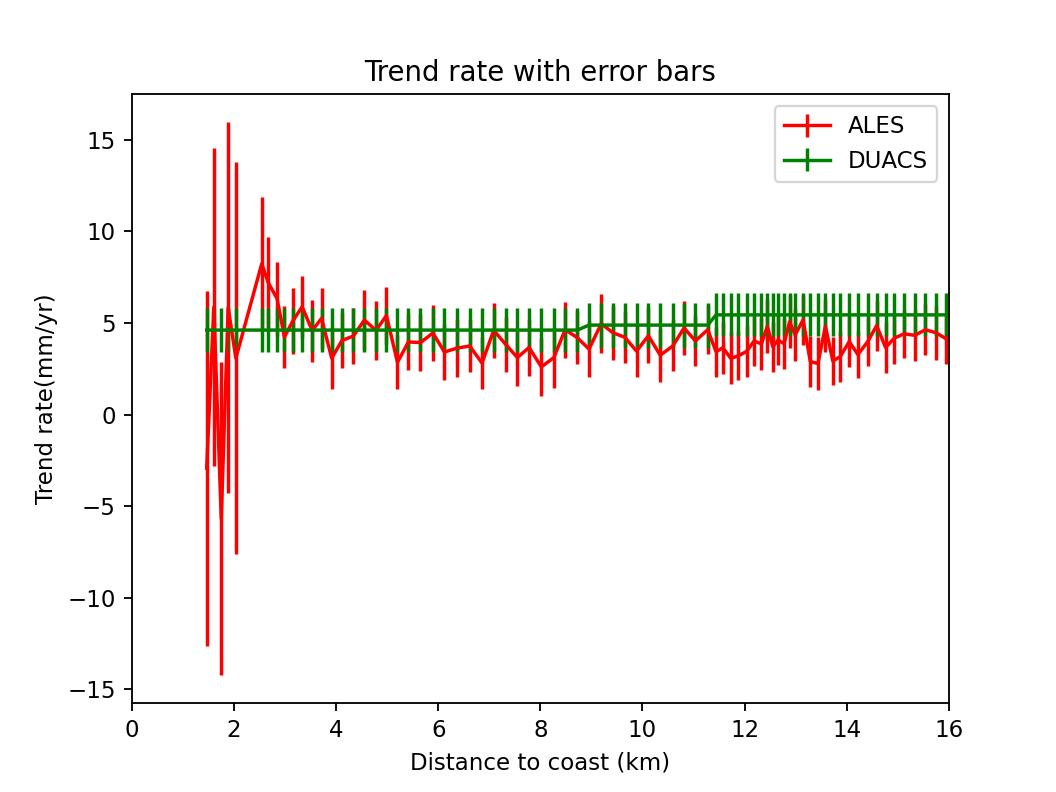

In [31]:
%matplotlib notebook
x = ds_ales['Dist_to_coast']
y = ds_ales['Trend']
x2 = ds_duacs['Dist_to_coast']
y2 = ds_duacs['Trend']
yerr = ds_ales['Trend_Error_Bar']
yerr1 = ds_duacs['Trend_Error_Bar']

fig, ax = plt.subplots()
ax.errorbar(x, y,yerr,color='r')
ax.set_xlim([0,16])
ax.errorbar(x2, y2,yerr1,color='g')
ax.set_xlabel('Distance to coast (km)')
ax.set_ylabel('Trend rate(mm/yr)')
ax.set_title('Trend rate with error bars')
ax.legend(labels=['ALES', 'DUACS'],loc='upper right')
plt.show()

<IPython.core.display.Javascript object>


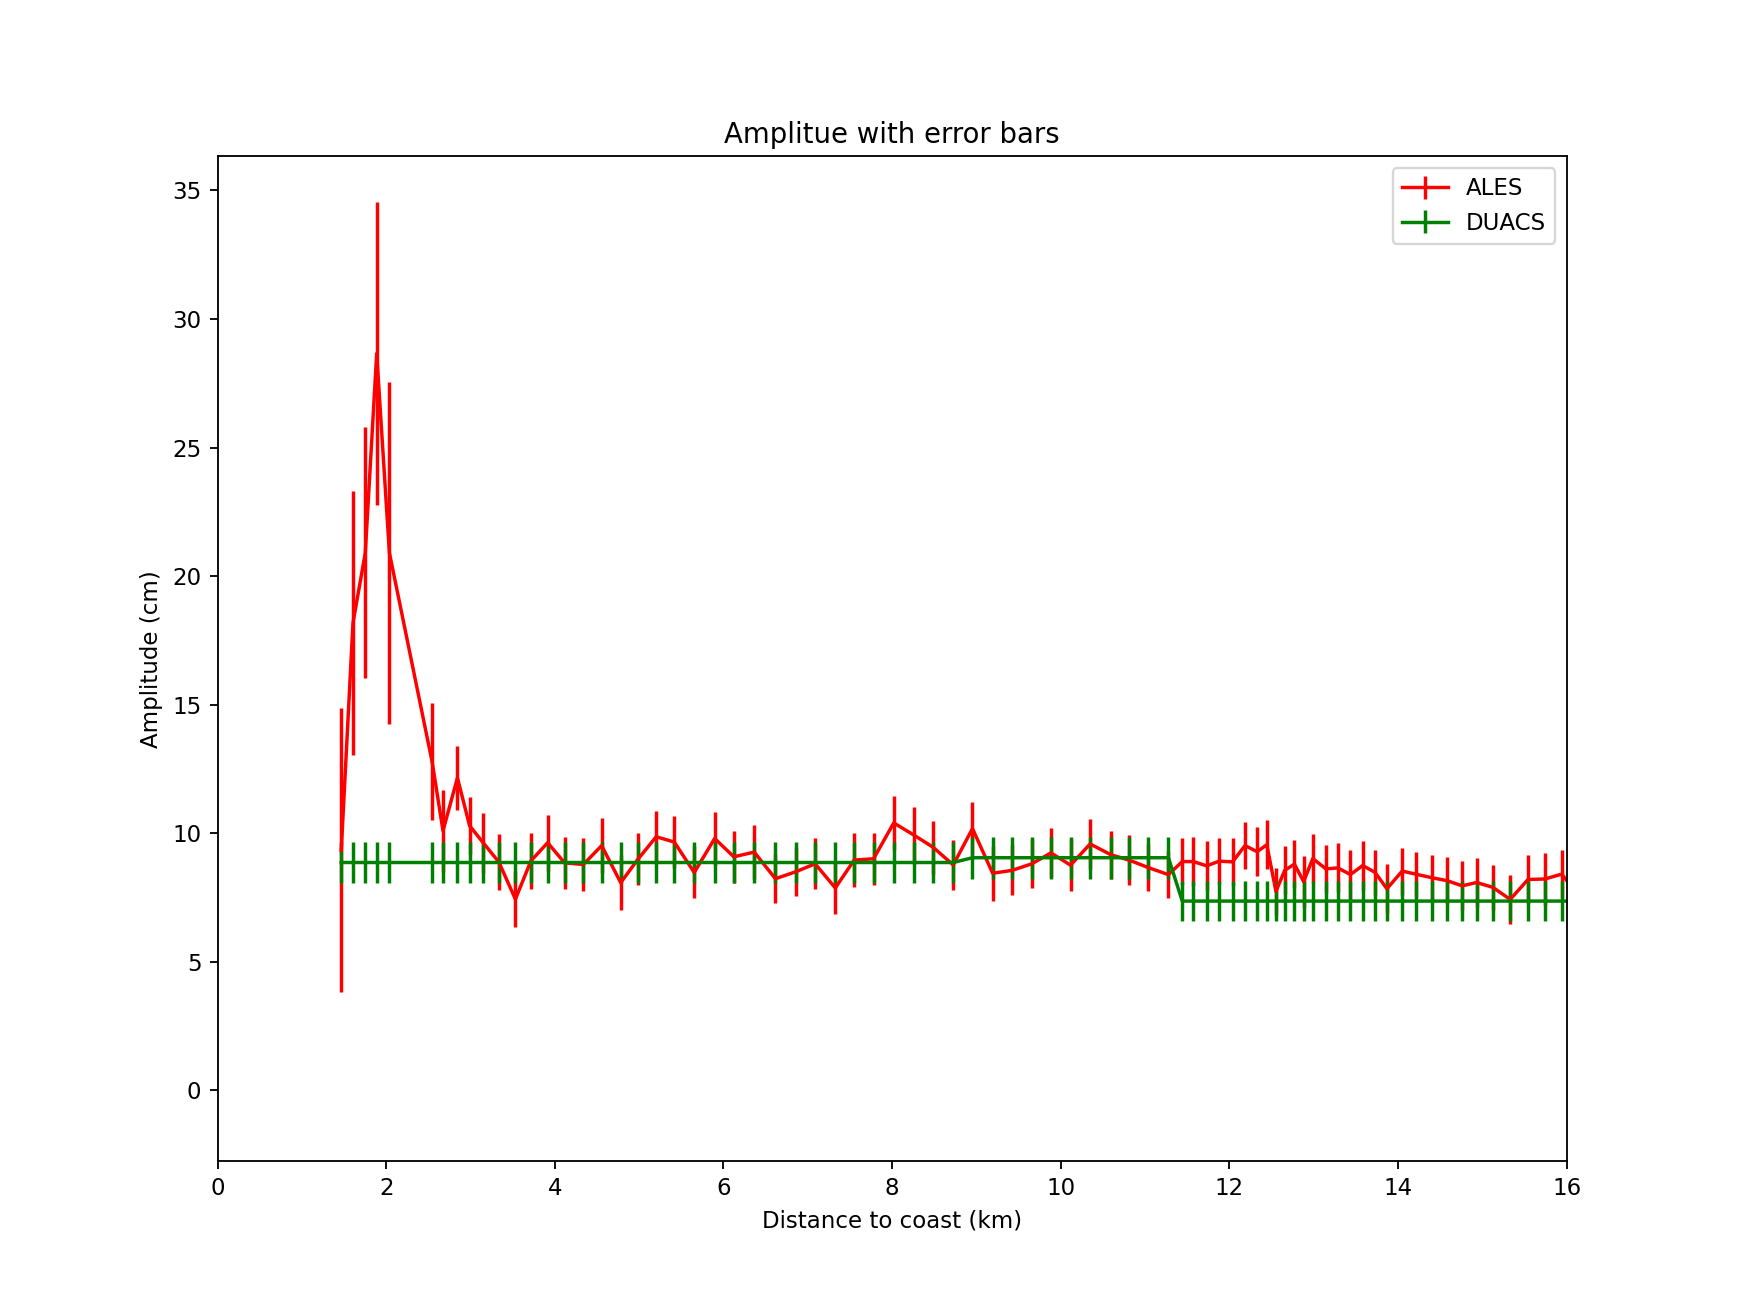

In [32]:
%matplotlib notebook
x = ds_ales['Dist_to_coast']
y = ds_ales['Amplitude']
x2 = ds_duacs['Dist_to_coast']
y2 = ds_duacs['Amplitude']
yerr = ds_ales['Amplitude_Error_Bar']
yerr1 = ds_duacs['Amplitude_Error_Bar']

fig, ax = plt.subplots()
ax.errorbar(x, y,yerr,color='r')
ax.set_xlim([0,16])
ax.errorbar(x2, y2,yerr1,color='g')
ax.set_xlabel('Distance to coast (km)')
ax.set_ylabel('Amplitude (cm)')
ax.set_title('Amplitue with error bars')
ax.legend(labels=['ALES', 'DUACS'],loc='upper right')
plt.show()

In [24]:
plt.hist(ds_ales['Trend_deviation'],bins='auto')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   3.,   4.,   3.,  10.,   5.,
         20.,  23.,  28.,  46.,  44.,  77.,  92., 131., 156., 164., 210.,
        226., 255., 284., 342., 329., 344., 363., 341., 335., 341., 307.,
        291., 251., 213., 208., 159., 143., 110.,  75.,  42.,  49.,  25.,
         28.,  17.,  13.,   3.,   6.,   3.,   2.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.02849796e+01, -1.01459642e+01, -1.00069487e+01, -9.86793329e+00,
        -9.72891784e+00, -9.58990240e+00, -9.45088695e+00, -9.31187151e+00,
        -9.17285606e+00, -9.03384061e+00, -8.89482517e+00, -8.75580972e+00,
        -8.61679427e+00, -8.47777883e+00, -8.33876338e+00, -8.19974793e+00,
        -8.060